<h1 style="color:#fffff;font-size:70px;font-family:Roboto;text-align:center;"><strong>Assignment 1 - COSC2753</strong></h1>


### <b>Student Name: Bui Minh Nhat</b>
### <b>Student ID: s3878174</b>
### <b>Course: COSC2753 - Machine Learning</b>
### <b>Lecturer: Dr. Nguyen Thien Bao</b>



## Table of Content

### 1. [Introduction](#1)

1.1 [Data Retrieving](#1.1) 

1.2 [Data information](#1.2)

1.3 [About the Dataset](#1.3)

1.4 [Datafield information](#1.4)

<br>

### 2. [Exploratory Data Analysis](#2)

2.1 [Statistic of the Dataset](#2.1)

2.2 [Domain knowledge](#2.2)

2.3 [Number of unique value](#2.3)

2.4 [Outlier Exploration](#2.4)

2.5 [Correlation](#2.5)

2.6 [Data frame properties](#2.6)

<br>

### 3. [Data Cleaning and Feature Engineering](#3)

3.1 [Handle missing value](#3.1)

3.2 [Drop Collumn](#3.2)

3.3 [Convert value in sepsis column to lowercase](#3.3)

3.4 [Corrext typo in sepsis column](#3.4)

3.5 [Outliers processing](#3.5)

3.6 [Convert Sepsis in to a binary value](#3.6)


3.7 [Normalizing and handling skewness of the dataset](#3.7)


3.8 [Final dataset](#3.8)

<br>

### 4. [Building Model](#4)

4.1 [Scaling feature](#4.1)

4.2 [Simple Logistic Regression Model](#4.2)

4.3 [Logistic Regression using Polynorminal ](#4.3)

4.4 [Polynorminal Logistic Regression with KFOLD Cross Validation](#4.4)

4.5 [ Polynorminal Logistic Regression with Regularization](#4.5)


4.6 [Decision Tree](#4.5)

4.7 [Decision Tree using grid search cv](#4.5)

4.8 [Random Foreset](#4.8)
<br>


### 5. [Ultimate model judgement](#5)

<br>

### 6. [References](#6)

<br>



<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Preparing data</strong></h1>

<a id="1"></a>
# 1. Introduction
****
Intensive care units (ICUs) are constantly under pressure to watch for indicators of sepsis in their patients (an infection that can accrue while staying in ICU). While this issue has been around for some time, the latest COVID-19 outbreak has brought it to light. An ICU's ability to predict whether a patient in the ICU would develop sepsis is tremendously important. This would help limit ICU resources while also minimizing the risk of health concerns (such as bed availability, etc.).

## Importing Necessary Libraries and datasets
****

In [19]:
# import libraries which are pandas and numpy
# Uncomment this if you have already install all of the library required in the project readmemd file
# !pip install pandas && pip install numpy && pip install seaborn && pip install matplotlib && pip install sklearn

In [20]:
import pandas as pd
import numpy as np
#For Encoding
#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Ploting module

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #
# scatter matrix library
from pandas.plotting import scatter_matrix

#set display 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [21]:
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

<a id="1.1"></a>
## 1.1  Data Retrieving
First ,a import the dataset using read_csv function. In order to ensure the from the csv file is in good shape, we have to eliminate the extra white space. After that, the data types must be checked to ensure no incorrect data types assigned. After finishing verifying the datatypes, the ingested data is cleaned by the following steps: typos, extra-whitespaces, cases, sanity checks, check for missing values, and identifying categorical data.


> **train Dataset**

In [22]:
# import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
train_df = pd.read_csv("./data/Paitients_Files_Train.csv", delimiter=',', skipinitialspace = True)

train_df.columns = train_df.columns.str.replace(' ', '') #strip the extra-whitespaces out

#Showing the head of the dataset
train_df.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [23]:
#Showing tail of the data set
train_df.tail(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


> **Sample test Dataset**

In [24]:
test_df = pd.read_csv("./Data/Paitients_Files_Test.csv", delimiter=',', skipinitialspace = True)

test_df.columns = test_df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("Rows and Collumns of dataset", str(test_df.shape))

test_df.head(5)

Rows and Collumns of dataset (169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [25]:
#Show the tail of the dataset
test_df.tail(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1
168,ICU200777,1,93,70,31,0,30.4,0.315,23,1


<a id="1.2"></a>
## 1.2 Data Information

> **Column name and datatype of train Dataset**

In [26]:
#Basic information of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


> **Column name and datatype of test Dataset**

In [27]:
#Basic information if the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


<a id="1.3"></a>
## 1.3 About the datasets
For this data set : the train dataset have 11 collumn and 599 rows and the test dataset have 169 row and 10 collumn. 
<p> There are 2 kind of data group for this dataset</p>
<ul><li>Trainning dataset Paitients_Files_Train.csv</li>
    <li>Testing dataset: Paitients_Files_Test.csv</li>
 </ul>
<p>As can be observe , the major data type for both training and testing data set are</p>
<ul><li>int64 : PRG, PL, PR, SK, TS, AGE, Insurance</li>
    <li>float64 : M11 , BD2</li>
    <li> object : ID for both dataset and Sepsis for the training data set </li>
</ul>
<p>The target variable for this assingment is Sepsis (we have typo Seppsis in the train dataset). After viewing the dataset, the Sepsis column have value either Negative or Positive which is a kind of categorical data therefore we can conclude that this is a classification Problems.</p>

<a id="1.4"></a>
## 1.4 Datafield definition :
According to the `README.MD` [cite]file of the dataset the definition of the table is as follow
<ul>
<li>ID : Uniue number to represent patient</li>
<li>PRG: Plasma glucose </li>
<li>PL: Blood Work Result-1 (mu U/ml)</li>
<li>PR: Blood Pressure (mm Hg)</li>
<li>SK: Blood Work Result-2 (mm) </li>
<li>TS: Blood Work Result-3 (mu U/ml)</li>
<li>M11: Body mass index (weight in kg/(height in m)^2</li>
<li>BD2:  Blood Work Result-4 (mu U/ml)</li>
<li>Age:  patients age  (years)</li>
<li>Insurance: If a patient holds a valid insurance card</li>
<li> Sepsis (target): Positive: if a patient in ICU will 
develop a sepsis , and Negative: otherwise </li>


</ul>

<a id="2"></a>
# 2. Exploratory Data Analysis
***

<a id="2.1"></a>
## 2.1 Statistics of the datasets

In [28]:
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


Due to the fact that the  `Sepssis` contains a typo, the column name is re adjust

In [29]:
train_df.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

In [30]:
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


#### Train dataset

*********

In [31]:
#Showing all of the important statistic of the datasets.
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the initial observation, the `count` value of all of the columns in the `train` dataset are all having the same value of 599 (which is equal to the size of the dataset) indicating there are no missing values occurs in all of the column of the dataset.

* With `PRG` column, the median value of the column is equal to 3.824, however the value of the 75 percentile is 6 and the `maximum` value is 17 which is larger than the 75 percentile therefore indicating a negative skew

* For the `PL` column of the train dataset, we can observe that the mean value of the collumn is equal to 120.153589, the 25% percentile is 99, the 75 % percentile is 140 there for we could say that this column have a normal distribution

* For `PR` column, the mean value of this column from the above mentioned table is 68.732888 (mu U/ml). The 25 % percentile of the column is 64 (mu U/ml), the 75% percenttile for the dataset is 80 (mu U/ml), indicating a normal distribution

* For `SK` column, we could observe that the mean value (which is 20.562604), the 25 % percentile of 0, 75 % percentile is 32. However the max value = 99 made this column have a negative skew. However this also indicating a potential for outlier. 

* Regarding the `TS` column the mean value 76.460768 However the 25% percentile is 0 and the 75 % percentile quartile is equal to 123.5. However the max value is 846 as well as more than 50% of the patient have the level of TS equal to 36 thus causing a negative skill. Furthermore, the max TS value is 800 which is the outlier of the `TS` column

* `M1ll` As can observe, the mean value is equal to 31.920033	(kg/m^2). There are also 25% of patient whoe have the BMI of 36.550000 (kg/m^2). The max value of the BMI is 67.1 (kg/m^2)



* From the `BD2` we can be observe the mean value of the BD2 column is 0.481187 (mu U/ml). The 25% percentile is 0.248 and the 75% percentile is equal to 0.647000 (mu U/ml) however the max value is 2.420000 (mu U/ml) which resulting in a negative skew

* With `Age` column , we can observe that the mean age of is equal to 33.290484. There are 75 % of patient who are 24 year old as well as 25 % patients who are 40 year old. The max age is 80 year old. Therefore resulting in a negative skew

The initial observation is verified using the histogram and boxplot

`Insurance`

<module 'matplotlib.pyplot' from '/Users/nhatbuiminh/opt/anaconda3/envs/ProjectNew/lib/python3.10/site-packages/matplotlib/pyplot.py'>

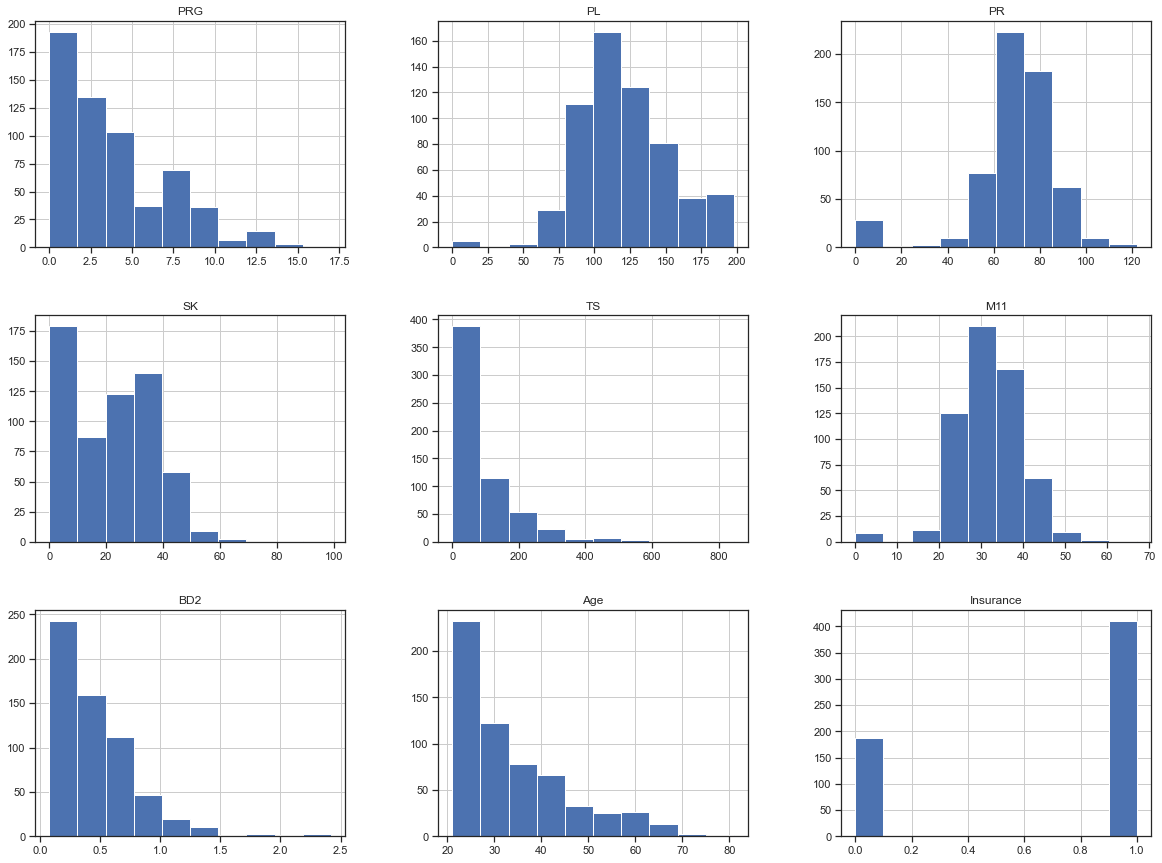

In [32]:
plt.rcParams['figure.figsize'] = [20, 15]
train_df.hist()
plt

From the observation, we can classified the skewness of each column are :
 <ul>
 <li>Left skew :  `PRG`, `SK`, `Age` and `BD2` </li>
 <li>Normal distribution value are `PL` , `PR`, `Mll`</li>
 </ul>

#### Test dataset

********

In [33]:
test_df.describe()
plot_group_by_column(test_df, "Sepsis")

NameError: name 'plot_group_by_column' is not defined

In [ ]:
test_df.median()

The test dataset consist of 9 column, each column have the value count of 169 which is consistance through out all of the column of the dataset which indicate there is no missing value.

* `PRG` : As can be be observe, the min value of the `PRG` Column have the `mean` value of 3.917160, the `min` value of 0 and the `max` value of 13. Regarding to the `quartile` of the dataset, `25 % ` percentile of patient have the `PRG` level = 1 1, `50%` percentile of patient have the `PRG` level equal to 3 which slightly less than the `mean` value and `75 %` percentile patient have the `PRG` level of 6. This indicate a left skew. 


* `PL`: For the abovemention `PL` column the `mean` value is 123.520710 (mu U/ml), the `min` value is 56 (mu U/ml) and the `max` value is 199 (mu U/ml). For the `25 % percentile`, the `PL` level is 102 (mu U/ml), the `50 % percentile` is 120(mu U/ml) and the `75 % percentile` is 80 (mu U/ml). This indicate a normal distribution.
<br>


* `PR`: The mean value for `PR` column is 70.426036 (mmHg), the min value is 0 (mmHg) which potentially outliers, the max value is 114 (mmHg). Regarding the quartile of this column, 75 %  of patient have the blood pressure of 62 (mmHg), 50% percent of patient have the blood pressure of 74 (mmHg) and 25 % of patient have the blood pressure of 80 (mmHg). This indicating a skew right.


* `SK` For the `SK` column, the mean value is  20.443787 (mm), the max value is 49 (mm) and min value of 0 (mm). Furthermore 25% percentile of patient have the Blood Work Result-2 of 0 (mm), 50% percentile of patient have the value of 23 (mm) and 75% percentitle of patient have the `SK` value of 32 (mm). This indicating a slightly skew right.


* `TS` For the Blood Work Result-3, we have `mean` value of 81 (mu U/ml), the `max` value of 540 (mu U/ml). Regarding the quartile, 75% of patient have the Blood Work Result-3 equal 0, 50% of the patient have the quartile is 0 and the 25% of patient have the level of 135(mu U/ml). This indicating a left skew


* `Mll`: For the `Mll` column, the `mean` value of 32.249704 (kg/m^2) `max` value of 57.3 (kg/m^2) and the `min` value is 0. Regarding the quartile the distribution `25% percentile` of patient have the BMI value of 27.6 (kg/m^2), `50% percentile` of patient is 32.4 (kg/m^2) and `75% percentile` patient is 36.6 (kg/m^2). This indicating a normal distribution


* `BD2`: The blood work result have the mean value of 0.438876 (mu U/ml), the max value of 1.698 (mu U/ml) and the min value of 0.1 (mu U/ml). Regarding the value of the quartile of the column, 75 % of the patient have the `BD2` index of 0.223, 50% of the patient have the `BD2` value of 0.343 (mu U/ml) and 25 % of patient take the value of 0.587 (mu U/ml)


* `Age`: Regarding the age of the patient, the mean value is 33.065089, the maximum age is 70 and the minimum age of 21. The 25 % percentile is 24 years old, the 50% percentile is 28 year old and the 75 % percentile is 42 year old which indcating a left skew.


* Insurance is a categorical column which take the value of either 0 or 1 

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]
test_df.hist()
plt.show()

From the observation, we can classified the skewness of each column are :
 <ul>
 <li>Left skew :  `PRG`,`PL`, `Age` and `BD2` </li>
 <li>Normal distribution value: `SK`, `Mll`</li>
 <li>Right skew: `PR`</li>
 </ul>


<a id="2.2"></a>
## 2.2  Domain knowledge

In order to process to the next step, the domain knowledge must be acquired :

* `PRG`: "under 100 mg/dL or 10 mg/L during fasting and less than 140 mg/dL or 14mg/L 2-hours postprandial". (Source : [1])


* PL: Blood Work Result-1 (mu U/ml): According to [2] the normal platelet count ranges from 150 (mu U/ml) to 450 (mu U/ml)

* PR: Blood Pressure (mm Hg) According to [3] The systolic blood pressure are classified into the following category:        <ul>
<li>Normal blood pressure : less than 120 (mmHg) </li>
<li>At risk of Prehypertension : from 120(mmHg) to 139(mmHg)</li>
<li>High blood pressure or Hypertension 140 (mmHg) or higher</li>
</ul>


* SK: Serum Potassium level: According to [4], normal range for Serum Potassium is between (3.5 to 5.5 mmol/L



* TS: Transferrin Saturation 


* M11: Body mass index (kg/m^2)
After [4]
<ul>
<li>Underweight: Body mass index is less than 18.5 kg/m^2</li>
<li> Normal: 18.5 to 24.9 kg/m^2</li>
<li> Overweight: 25.0 to 29.9 kg/m^2</li>
<li> Obese: 30.0 kg/m^2 or higher</li>
</ul>

* BD2: Blood Work Result-4 (mu U/ml)

<a id = "2.3"></a>  
## 2.3 Number of unique value

We can checkthe ID of patients to see if it's duplicate or not

> ### Train dataset

In [ ]:
#Count the number of duplicate ID of train dataset
print(train_df['ID'].duplicated().sum())

> ### Test dataset

In [ ]:
#Count the number of duplicate ID of test Dataset
print(test_df['ID'].duplicated().sum())

<a id="2.4"></a>
## 2.4 Outlier Exploration

> #### Train datset

In [ ]:

def plot_box (df, name =''):
    cols = df.columns
 
    for i in range(1, cols.size -1):
        if(df[cols[i]].dtype == 'object'):
            continue
        plt.subplot(6, 2, i)
        df[cols[i]].plot(kind='box')
        plt.title(name +" " +  cols[i], fontsize = 20)
    plt.tight_layout()
    plt.show()
plot_box(train_df)

As can be observe from the box plot, except for the `Insurance`, `ID` ans `SEPSIS` collumn, according to the above mentioend box plot, the column that contains outliers are as follow:
* `PRG`
* `PL`
* `PR`
* `SK`
* `TS`
* `Mll`
* `BD2`
* `AGE`

> #### Test Data frame 

In [ ]:
plot_box(test_df)

* As can be observe with the test dataset, the following variable cotumns outliers : 
`PR`,`TS `, `BD2`, `M11`, `Age` 
contains outliers.
* Further more `TS` `SK`, `M11` have the value = 0

<a id="2.5"></a>
## 2.5 Correlation 

> ####  Train dataset

In [ ]:
corr = train_df.corr(method = 'pearson')
sns.heatmap(data=corr, cmap='magma', annot = True)
plt.title("Correlations Among Features", y = 1.03, fontsize=20,pad=40)
plt.show()

The correlation is calculated using Pearson correlation methodology. Pearson Correlation range from +1 to -1. With +! is positive correlation and -1 is negative correlation. 
As can be observe from the heatmap, we can see that the correlated are: 
* To examine the correlation the Pearson correlation methode have been use. From the observation from the heat map, `Age` Feature is slightly correlated in a positive direction with the `PRG` feature.
+ `M11` Feature slightly positive correlate with `SK` value
+ `TS` feature is having a slight positve correlation with `SK`

In [ ]:
### Count number of category
plt.figure(figsize=(20,10))
sns.countplot(x='Sepsis', data= train_df)
plt.title("Sepsis Count", y = 1.03, fontsize=20,pad=40)
plt.legend(labels = ['Positive','Negative'])


As can be observe from the bar chart, around over 200 Patient listed in the 1 `train` dataset are Positive with `Sepsis`.


#### Age group of train dataset

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = train_df, x= 'Age')
plt.title("Age Count Train", y = 1.03, fontsize=20,pad=40)

* As can be observe the majority of patient are in theire early twenty, most of the patient range from 30 to 50 year olds and only a minority of people are over 60

In [ ]:
sns.catplot(x='Sepsis', y = 'Age', data = train_df)

* The higher the patient age the higher the chance that they are positive with `Sepsis`.

In order to undestand the cause of sepsis, we look for relational result between all of the collumn and the 'Sepsis' column

In [ ]:
def plot_group_by (group_by_df, cols, name, color_input= ['#ef8a62','#67a9cf']):
    print("--Data Table -----")
    print(group_by_df)
    for i in range(1, 9):
        plt.subplot(4, 2, i)
        group_by_df[cols[i]].plot(kind='bar', color=color_input)
        plt.ylabel(cols[i])
        plt.title(name +" "+ cols[i] + " and  Sepsis", fontsize = 20)
        # train_df[train_df['Age'] < 30].groupby('Sepsis').mean().plot(kind = "bar",legend = True)
    plt.tight_layout()
    plt.show()
    

In [ ]:
plt.figure(figsize=(20,10))
cols = train_df.columns
plot_group_by(train_df.groupby('Sepsis').mean(),cols,"Mean of")

In [ ]:
cols = train_df.columns
plot_group_by(train_df.groupby('Sepsis').median(),cols,"Median of", color_input=['#af8dc3','#7fbf7b'])

* As can observe from the barchart, the mean and median of the blood indicator `PRG`,`PL`,`SK`,  and `BD2` is higher in patients who are positive with `Sepsis`. 
* Therefore, a if a patience who have a higher `PRG`, `PL`,`SK` or `BD2` than the mean or the meadian value, they should be test for Sepsis.

* Also, the mean, and median age of the patient who are diagnose `Positive` with Sepsis is higher than those who are `negative` with `Sepsis`

## Correlation of test data


In [ ]:
corr = test_df.corr(method = 'pearson')
sns.heatmap(data=corr, cmap='magma', annot = True)
plt.title("Correlations Among Features", y = 1.03, fontsize=20,pad=40)
plt.show()

As can be observe from the correlation matrix, the following collumns of variable are correlated:
 
* `Age` are correlated in the possitive direction with `PRG`
*  `TS` and `M11` are positively correlated with `Sk`    

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = test_df, x= 'Age')
plt.title("Age Count Train", y = 1.03, fontsize=20,pad=40)
 

Also, we can observe that the majority of the patient admitted in the ICU are in their early twenty.

<a id="2.6"></a>
## 2.6 Data frame properties

In [ ]:
train_df.info()

Remove inconsistent white space

In [ ]:
def strip_whitespace(df):
  #Iterate throught the column field to find white space
  for features in df.columns:
    #The data type for this dataset is only object
    if (df[features].dtype == 'object'):
      df[features] = df[features].apply(lambda s:s.strip() )
  return df;
train_df = strip_whitespace(train_df)
test_df = strip_whitespace(test_df)

Check for duplication after remove whitespace

In [ ]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of train dataset: ",train_df['ID'].duplicated().sum())

In [ ]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of test dataset : ", test_df['ID'].duplicated().sum())

To makesure, drop dupplicate patients base on ID feature as each patients can only have one unique id

In [ ]:
#De duplicate base on ID
train_df.drop_duplicates(subset=['ID'], inplace = True)
train_df.drop_duplicates(subset=['ID'], inplace = True)

Verify after deduplicate

In [ ]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of train dataset",train_df['ID'].duplicated().sum())

In [ ]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of test dataset",test_df['ID'].duplicated().sum())


### Check for null value in the dataframe

In [ ]:
def percentMissing(df) :
  percent_missing = df.isnull().sum() * 100 / len(df)
  print(percent_missing)

#As can be seen the dataset is clean and contains no null value which is greate
percentMissing(train_df)

In [ ]:
percentMissing(test_df)


## Check zero

Due to the fact that the dataframe have some zero value, we can check the values of the following values : 

In [ ]:
def countZeros(df,name_of_df) :
  print("---Number of zero value of " + name_of_df + "---")
  for column_name in df.columns:
      column = df[column_name]
      # Get the count of Zeros in column 
      count = (column == 0).sum()
      print(column_name, ': ', count)


In [ ]:
#Count of train df
countZeros(test_df,"Train dataset")

In [ ]:
countZeros(test_df,"Test dataset")

<a id ="3"></a>
# 3. Data Cleaning and Feature Engineering

<a id="3.1"></a>
## 3.1 Handle missing value

As we can observe, a some of the field have 0 value. According to the README MD file [ ] it have some missing value. Therefore we assuming that missing value are fill under zero.

To handle missing value we impute the collumn with mean and median value except for `TS`, `PRG`, `M11` as we could build a linear regression model to handle missing value for these.

In [ ]:
avoid_list = ['PRG', 'M11', 'TS']
def fill_zero_median(input_df,avoid_list) :
  df = input_df.copy() #Create a discreate copy of the dataframe
  for column in df.columns:
    if(((column in avoid_list) == False) and (df[column].dtype != "object")):
      print(column)
      df[column] = df[column].replace(0,df[column].median())

  return df
process_train_df = fill_zero_median(train_df,avoid_list)
process_test_df = fill_zero_median(test_df,avoid_list)

In [ ]:
countZeros(process_train_df,"")

In [ ]:
countZeros(process_test_df,"")

Due to the fact that Sepsis column is a object string data type, it might contains mispelling as well as case inconsistancy. Therefore we need to convert all of the case in to lower case as well as checking for any typos 

<a id="3.2"></a>
### 3.2 Drop Collumn

In [ ]:
#Define a util function to drop columns for both data set
def dropCols (input_df, dropList) :
  input_df.drop(columns = dropList, inplace = True);
  return input_df

dropList=['ID', 'Insurance']
process_train_df = dropCols(process_train_df,dropList)
test_df = dropCols(test_df,dropList)

### 3.3 Convert value in sepsis column to lowercase

Count the unique value of Sepsis column

In [ ]:
print("Number of categorical column in the train datset ",process_train_df['Sepsis'].value_counts())

In [ ]:
process_train_df['Sepsis']= process_train_df['Sepsis'].map(lambda s:s.lower() if type(s) == str else s)

In [ ]:
process_train_df.tail(10)

<a id ="3.4"></a>
### 3.4 Correct typo in `Sepsis` column value

In [ ]:
!pip install autocorrect
from autocorrect import spell

In [ ]:
process_train_df["Sepsis"] = [' '.join([spell(i) for i in x.split()]) for x in train_df['Sepsis']]

In [ ]:
#Verifying the traininig data frame
process_train_df.head(5)

Verifying the dataset

In [ ]:
#Train dataframe
train_df

In [ ]:
#Test dataframe
test_df

<a id ="3.5"></a>
##  3.5 Outliers processing:

We need to do outlier processing for the train and test dataset

In [ ]:
process_train_df.dtypes

In [ ]:
def outlier_detection(df,col_name):
    q_low = df[col_name].quantile(0.02)
    q_high = df[col_name].quantile(0.93)
    print("----Outlier detection for column: ",col_name,"----")
    print("q_low: ", q_low)
    print("q_high", q_high)
    upper_outlier = set([])
    lower_outlier = set([])
    
    for i, x in enumerate(df[col_name]):
      if(x > q_high) :
        upper_outlier.add(x)
      if(x < q_low) :
        lower_outlier.add(x)
        
    if len(lower_outlier) > 0: 
      sorted(lower_outlier)
      
    print("Number of upper outlier: ",len(upper_outlier))
    print("----- Outlier value for: ", col_name,"-----")
    print("Upper value: ",sorted(upper_outlier))
    print("Lower value: ", lower_outlier)


A function to handle outlier

In [ ]:
# A function to handle outlier and replace outliers with 0 value
def outlier_handler(df,col_name):
  q_low = df[col_name].quantile(0.02)
  q_high = df[col_name].quantile(0.93)
  df.loc[(df[col_name] > q_high) | (df[col_name] < q_low), col_name] = 0
  return df


In [ ]:
def nanConverter(df):
    df.replace(0,np.nan, inplace = True)
    return df;

## `PRG` Column

In [ ]:
outlier_detection(process_train_df,'PRG')

In [ ]:
process_train_df = outlier_handler(process_train_df,'PRG')

## `PL` column:

> **Train Dataset**

In [ ]:
outlier_detection(process_train_df,'PL')

In [ ]:
process_train_df = outlier_handler(process_train_df,'PL')

> **Test Dataset**

In [ ]:
outlier_detection(test_df,'PL')

In [ ]:
process_test_df = outlier_handler(test_df,'PL')

## `PR` column:

> **Train Dataset**

In [ ]:
outlier_detection(process_train_df,'PR')

> **Test Dataset**

In [ ]:
outlier_detection(test_df,'PR')

## `SK` column:

> **Train Dataset**

In [ ]:
outlier_detection(process_train_df,'SK')

In [ ]:
process_test_df = outlier_handler(test_df,'SK')

> **Test Dataset**

In [ ]:
outlier_detection(process_test_df,'SK')

In [ ]:
process_test_df = outlier_handler(process_test_df,'SK')

## `TS` column:


> **Sample train Dataset**

In [ ]:
outlier_detection(process_train_df,'TS')

> **Sample test Dataset**

In [ ]:
outlier_detection(process_test_df,'TS')

In [ ]:
process_test_df = outlier_handler(process_test_df,'TS')

## `M11` column:

> **Sample train Dataset**

In [ ]:
outlier_detection(process_train_df,'M11')

In [ ]:
process_train_df = outlier_handler(process_train_df,'M11')

> **Sample test Dataset**

In [ ]:
outlier_detection(process_test_df,'M11')

In [ ]:
process_test_df = outlier_handler(process_test_df,'M11')

## `BD2` column:

> **Sample train Dataset**

In [ ]:
outlier_detection(process_train_df,'BD2')

In [ ]:
process_train_df = outlier_handler(process_train_df,'BD2')

> **Sample test Dataset**

In [ ]:
outlier_detection(test_df,'BD2')

In [ ]:
process_test_df = outlier_handler(process_test_df,'BD2')


### Use interpolation to handle outlier value

### > **Train Dataset**

In [ ]:
percentMissing(process_train_df)

In [ ]:
countZeros(process_train_df,"")

In [ ]:
process_train_df = nanConverter(process_train_df)

In [ ]:
process_train_df = process_train_df.interpolate()

In [ ]:
process_train_df

In [ ]:
plot_box(train_df)

However after doing some interpolation we still have some Nan value.

In [ ]:
countZeros(process_train_df,"Train dataset")

In [ ]:
percentMissing(process_train_df)

In [ ]:
process_train_df = process_train_df.dropna()

In [ ]:
percentMissing(process_train_df)

Compare original train DF to the process_train df

In [ ]:
plot_box(train_df)

As can be observe from the box plot, we only need to resolve the outlier for `PR` , `SK`, `TS` and `Age`

We could resolve the outlier by filling it with median value

In [ ]:
#Fill outlier with median value
def fill_median(input_df,fill_list):
  df = input_df.copy()
  for col_name in fill_list:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df[col_name]= df[col_name].loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df

`PR`

In [ ]:
outlier_detection(process_train_df, 'PR')

`SK`

In [ ]:
outlier_detection(process_train_df, 'SK')

## `TS`

In [ ]:
outlier_detection(process_train_df, 'TS')

### `Age`
After closer examination, the age value of the dataset is within the limit of normal age, therefore we elave it alone


In [ ]:
outlier_detection(process_train_df, 'Age')

Filling outlier with median value

In [ ]:
processed_train_df = fill_median(process_train_df,['PR','SK','TS'])

In [ ]:
# processed_train_df.plot(kind='box')
plot_box(process_train_df)

After filling the outlier with median value, we still have PR and TS collumn are outlier

`PR`

In [ ]:
outlier_detection(processed_train_df,'PR')

As can observe, the outlier are fall in normal case of our domain knowledge therefore we decide to keep it as is

`TS`

In [ ]:
outlier_detection(processed_train_df,'TS')

We need to drop outliers of `TS` collumn

In [ ]:

def drop_numerical_outliers(df, z_thresh=3, cols=None):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |
              (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df.dropna()
    return df

for i in range(3):
    processed_train_df = drop_numerical_outliers(
    processed_train_df, cols=['TS','SK','PR'])


In [ ]:
#Box plot for processed_train_df
plot_box(process_train_df)

We still have outlier `Age` colunn

`Age`

In [ ]:
outlier_detection(process_train_df,'Age')

As can be obeserve, the age is within normal age range, therefore wwe

<a id ="3.6"></a>
## 3.6 Convert `Sepsis` in to binary number
***
Since `Sepsis` just have the `Positive` and `Negative` values so I want to convert them to 0 for Negative and 1 is for Positive

In [ ]:
binarysepsis_train_df = pd.get_dummies(process_train_df["Sepsis"])
binarysepsis_train_df

With the function get dummise the categrical colum `sepsis` which contains `positive` or `negative` of its value have been transfer into a binary value of two new column `Negative` and `Positve` of the `binarysepsis_train_df`. Now we need to merget the positive column back into the `train_df` data frame.

In [ ]:
process_train_df = pd.concat((binarysepsis_train_df, process_train_df), axis=1)

In [ ]:
process_train_df

After concatination of the two dataset, we conventionalize the result for the `Sepsis` column are as follow :
<ul>
  <li> 1 : Positive
  <li> 0 : Negative
</ul>
therefore we drop the negative and Sepsis column and rename the Positive column to Sepsis

In [ ]:
dropList = ["Negative","Sepsis"]
#Drop column
process_train_df = dropCols(process_train_df,dropList)
#Rename Positive column to Sepsis
process_train_df = process_train_df.rename(columns={"Positive":"Sepsis"})

In [ ]:
#Verifying the train_df
processed_train_df.head(5)

In [ ]:
processed_train_df.tail(5)

As can be seen the sepsis have been convert from the categorical data to a binary integer

In [ ]:
processed_train_df.dtypes

## For test dataset

In [ ]:
percentMissing(process_test_df)

In [ ]:
countZeros(process_test_df,"Test dataset")

In [ ]:
test_df

In [ ]:
process_test_df = nanConverter(process_test_df)

In [ ]:
process_test_df = process_test_df.interpolate()

In [ ]:
#Plox bot Applcation
plot_box(process_test_df)

However after done interpolation we have some missing value

In [ ]:
countZeros(process_test_df,"Test dataset")

In [ ]:
percentMissing(process_test_df)

In [ ]:
process_test_df.fillna(process_test_df.median)

Verify once more

In [ ]:
process_test_df.dropna(inplace = True)

In [ ]:
percentMissing(process_test_df)

In [ ]:
process_test_df = fill_median(process_test_df,['PRG','PR'])

In [ ]:
# process_test_df.plot(kind = 'box')
plot_box(process_test_df)

`Train dataset`

In [ ]:
process_train_df

In [ ]:
process_train_df.hist()
plt.show()

<a id="3.7"></a>
### 3.7 Handling skewness and normalize of the dataframe

In [ ]:
countZeros(process_train_df,"")

In [ ]:
percentMissing(process_train_df)

In [ ]:
process_train_df.columns

In [ ]:
def handling_skew(df, train = True):
    for column in df.columns:
        if(train==True):
            if(column != 'Sepsis'):
                df[column]=df[column].map(lambda x: np.sqrt(x))
        else:
             df[column]=df[column].map(lambda x: np.sqrt(x))
    return df
process_train_df = handling_skew(process_train_df)
    

## Normalize the dataframe

In [ ]:
def normalize(df, train=True):
    for column in df.columns:
        if(train==True):
            if(column != 'Sepsis'):
                df[column] = df[column] / df[column].abs().max()
        else:
            df[column] = df[column] / df[column].abs().max()
    return df

# view normalized data


In [ ]:
process_train_df = normalize(process_train_df)

In [ ]:
process_train_df.hist()
plt.show()

`Test Dataset`

In [ ]:
process_test_df

In [ ]:
process_test_df.hist()

### Handling skewness

In [ ]:
process_test_df = handling_skew(process_test_df, train=False)

Repeat the same process for the test dataset

In [ ]:
process_test_df = normalize(process_test_df, train=False)

In [ ]:
process_test_df.hist()
plt.show()

In [ ]:
#Final verification
percentMissing(process_test_df)
process_test_df.fillna(process_test_df.median(), inplace= True)
percentMissing(process_test_df)

<a id ="3.8"></a>
## 3.8 Final dataset

In [ ]:
process_train_df.head(15)

In [ ]:
process_train_df.tail(15)

In [ ]:
#Test dataset
process_test_df.head(15)

In [ ]:
process_test_df.tail(15)

<a id ="4"></a>
# 4 Building model

This is a classification problem therefore the algorithm of choice are follow: 
*  Logistic Regression
*  Logistic Regression with normalization
*  Decisiontree
*  Random Forest

In [ ]:
#Feature selection
x = process_train_df.drop(['Sepsis'], axis=1)
# Label
y = process_train_df['Sepsis']

In [ ]:
# !conda install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Generate a validation set

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=40)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

<a id ="4.1"></a>
## 4.1 Scaling feature

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_val = scaler.fit_transform(x_val)


> *Create an empty array to contains model performance

In [ ]:
res_arr = []

In [ ]:
class model_perf :
    def __init__(self, classification_report, confusion_matrix,auc_roc,model, name, f1_score_inp = 0, accuracy = 0, precision = 0):
        self.classification_report = classification_report
        self.confusion_matrix = confusion_matrix
        self.auc_roc = auc_roc
        self.model = model
        self.name = name
        self.f1 = f1_score_inp
        self.accu = accuracy
        self.precision = precision
    

### Ultilties Function

In [ ]:
# This is a ultilities function fror plotting confusion matrix
def plot_confusion(test, input_pred):
    df_cm = pd.DataFrame(confusion_matrix(
        test, input_pred), range(2), range(2))
    # plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(df_cm, annot=True, cmap='PuRd')  # font size
    plt.title('Confusion Matrix')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    return df_cm

<a id ="4.2"></a>
## 4.2 Simple Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model_1 = LogisticRegression()


In [ ]:
log_model_1.fit(x_train, y_train)

In [ ]:
pred_log_model_1 = log_model_1.predict(x_val)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_log_model_1))

In [ ]:
from sklearn.metrics import confusion_matrix
df_cm_model_1 = plot_confusion(y_val, pred_log_model_1)

In [ ]:
# Put information to the storage result array
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,precision_score
accu = accuracy_score(y_val,pred_log_model_1)
precis = precision_score(y_val,pred_log_model_1)
f1 = f1_score(y_val, pred_log_model_1)
res_arr.append(model_perf(classification_report(y_val, pred_log_model_1), df_cm_model_1, roc_auc_score(y_val,log_model_1.predict_proba(x_val)[:,1]),log_model_1, "Logistic Regression",f1_score_inp = f1, accuracy= accu, precision=precis))


<a id ="4.3"></a>
## 4.3 Logistic Regression using Polynorminal 

### Evaluate model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_val_poly = poly.fit_transform(x_val)


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model_2 = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced')

In [ ]:
log_model_2.fit(x_train_poly, y_train.ravel())

#### Verify the model with test dataset

In [ ]:
poly_norm_log_pred = log_model_2.predict(x_test_poly)    

In [ ]:
# pylint: disable=missing-final-newline
print(classification_report(y_test,poly_norm_log_pred))

In [ ]:

df_cm_model_2 = plot_confusion(y_test, poly_norm_log_pred)


#### Verify the model with validation dataset

In [ ]:
poly_norm_log_pred = log_model_2.predict(x_val_poly)

In [ ]:
model_2_report = classification_report(y_val,poly_norm_log_pred)
print(model_2_report)

In [ ]:

df_cm_model_2 = plot_confusion(y_val, poly_norm_log_pred)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
f1_model_2 = f1_score(y_val, poly_norm_log_pred)
precis = precision_score(y_val , poly_norm_log_pred)
accu = accuracy_score(y_val, poly_norm_log_pred)
res_arr.append(model_perf(model_2_report, df_cm_model_2, roc_auc_score(y_val,log_model_2.predict_proba(x_val_poly)[:,1]),log_model_2, " Polynorminal Logistic Regression without regularization",f1_score_inp=f1_model_2, precision = precis, accuracy=accu ))



<a id ="4.4"></a>
## 4.4 Polynorminal Logistic Regression with KFOLD Cross Validation

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
tmp = x.to_numpy()
tmp_y = y.to_numpy()
report = []
fold_no = 1 #For counting number of fold
# We does npt penalty the model
log_model_3 = LogisticRegression(random_state=0, penalty='none', solver='saga', max_iter=1000, class_weight='balanced')
for train_index, test_index in kf.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print("Fold number :  " ,fold_no)
    fold_no +=1
    x_k_train, x_k_test = tmp[train_index], tmp[test_index]
    y_k_train, y_k_test = tmp_y[train_index], tmp_y[test_index]
    log_model_3.fit(x_k_train, y_k_train)
    pred_log_model3 = log_model_3.predict(x_k_test)
    res = classification_report(y_k_test, pred_log_model3)
    report.append(res)
    print(res)

As can observe from the aboved mentioned table , for logistic regression, non regularization, the f1 score for k-split with split = 2 yeild the high f1 score with:
 ```
       precision  recall  f1-score   support
 0       0.92      0.81      0.86        43
 1       0.64      0.82      0.72        17
 ```

In [ ]:

kf = KFold(n_splits=2)
tmp = x.to_numpy()
tmp_y = y.to_numpy()
report = []
fold_no = 1
log_model_4 = LogisticRegression(random_state=0, penalty='none', solver='saga', max_iter=1000, class_weight='balanced')
for train_index, test_index in kf.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print("Fold number :  " ,fold_no)
    fold_no +=1
    x_k_train, x_k_test = tmp[train_index], tmp[test_index]
    y_k_train, y_k_test = tmp_y[train_index], tmp_y[test_index]
    log_model_4.fit(x_k_train, y_k_train)
    pred = log_model_4.predict(x_k_test)
    res = classification_report(y_k_test, pred)
    report.append(res)
    print(res)
pred_log_model_4 = log_model_4.predict(x_val)
res = classification_report(y_val, pred_log_model_4)
# print(res)



In [ ]:
df_cm_model_4 = plot_confusion(y_val, pred_log_model_4)

In [ ]:
f1_model_4 = f1_score(y_val, pred_log_model_4)
accu = accuracy_score(y_val, pred_log_model_4)
precis = precision_score(y_val, pred_log_model_4)
res_arr.append(model_perf(classification_report(y_val, pred_log_model_4), df_cm_model_4, roc_auc_score(y_val,log_model_4.predict_proba(x_val)[:,1]),log_model_4, "Logistic Regression with Kfold cross validation", f1_score_inp=f1_model_4, accuracy=accu, precision = precis))

<a id ="4.5"></a>
## 4.5 Logistic Regression with Regularization

#### Apply Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV

# define model
model = LogisticRegression()
# define evaluation
#We have learn that for 2 fold yield the best result
cv = KFold(n_splits= 2)
# define parameter grid
parameters_list= {
    'penalty' : ['none','l2'], 
    'C'       : np.logspace(-3,3,100),
    'solver'  : ['newton-cg', 'lbfgs'],
}

# define search
search =GridSearchCV(model, parameters_list, scoring = 'f1', verbose = True, n_jobs=-1, cv=cv)
# execute search
result = search.fit(x_train, y_train)
# summarize result
pred = search.predict(x_val)
print(classification_report(y_val, pred))
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



In [ ]:
log_model_5 = search.best_estimator_

In [ ]:
pred_log_model_5 = log_model_5.predict(x_val)


In [ ]:
print(classification_report(y_val, pred_log_model_5))

In [ ]:
f1_model_5 = f1_score(y_val, pred_log_model_5)
accu = accuracy_score(y_val, pred_log_model_5)
precis = precision_score(y_val, pred_log_model_5)
res_arr.append(model_perf(classification_report(y_val, pred_log_model_4), df_cm_model_4, roc_auc_score(y_val,log_model_4.predict_proba(x_val)[:,1]),log_model_4, "Logistic Regression with Kfold cross validation and Regularization",f1_score_inp = f1_model_5, accuracy = accu, precision=precis))

<a id ="4.6"></a>
## 4.6 Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
### Prunning
dtree = tree.DecisionTreeClassifier(class_weight='balanced')
path_dtree = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path_dtree.ccp_alphas, path_dtree.impurities

In [ ]:
models = []
for ccp_alpha in ccp_alphas:
    print(ccp_alpha)
    dtree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    dtree.fit(x_train, y_train)
    models.append(dtree)

In [ ]:
from sklearn.metrics import f1_score
def plot_score_tree(models, ccp_alphas, title='Score'):
        train_scores = [f1_score(y_train, model.predict(x_train), average='macro') for model in models]
        val_scores = [f1_score(y_val, model.predict(x_val), average='macro') for model in models]
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xlabel("alpha")
        ax.set_ylabel("f1_score")
        ax.set_title("Accuracy vs alpha for training and testing sets")
        ax.plot(ccp_alphas, train_scores, marker='o', label="train",
                drawstyle="steps-post")
        ax.plot(ccp_alphas, val_scores, marker='o', label="test",
                drawstyle="steps-post")
        ax.legend()
        plt.show()
plot_score_tree(models, ccp_alphas)

We can choose alpha = 0.02

In [ ]:
dtree = tree.DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.02 , random_state=0 )
dtree.fit(x_train, y_train)

In [ ]:
pred = dtree.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
plot_confusion(y_test,pred)

#### Verify the model with validation dataset

In [ ]:
pred_dtree = dtree.predict(x_val)

In [ ]:
pred_a = dtree.predict(process_test_df)
pred_a

In [ ]:
print(classification_report(y_val,pred_dtree))

In [ ]:
df_cm_dtree_1 = plot_confusion(y_val,pred_dtree)

In [ ]:
# Add to result array
accu = accuracy_score(y_val,pred_dtree)
precis = accuracy_score(y_val, pred_dtree)
f1_score_tree_1 = f1_score(y_val, pred_dtree)
res_arr.append(model_perf(classification_report(y_val, pred_dtree), df_cm_dtree_1, roc_auc_score(y_val,dtree.predict_proba(x_val)[:,1]),dtree, "Decision Tree",f1_score_inp=f1_score_tree_1, accuracy=accu, precision=precis))

##Todo: Implement for validation dataaset

<a id ="4.7"></a>
## 4.7 Decision tree with grid search cv

In [ ]:
# Create the parameter grid 
params_distribution= {
    'max_depth': [2, 3, 5, 10, 20,30,50,100],
    'min_samples_leaf': [5, 10, 20,30, 50, 100],
    'criterion': ["gini", "entropy"],
    'ccp_alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid = params_distribution, 
                           cv=cv, n_jobs=-1, verbose=True, scoring = "f1",refit = "f1")

#Execute search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Score of after finetuning different Parmeters

In [ ]:
df_score = pd.DataFrame(grid_search.cv_results_)
df_score.head()

In [ ]:
best_dtree = grid_search.best_estimator_

In [ ]:
print(classification_report(y_val, best_dtree.predict(x_val)))

In [ ]:
df_cm_bestdtree = plot_confusion(y_val, best_dtree.predict(x_val))

In [ ]:
accu = accuracy_score(y_val,best_dtree.predict(x_val))
precis = precision_score(y_val,best_dtree.predict(x_val))
f1_score_tree_2 = f1_score(y_val, best_dtree.predict(x_val))
res_arr.append(model_perf(classification_report(y_val, best_dtree.predict(x_val)), df_cm_bestdtree, roc_auc_score(y_val,best_dtree.predict_proba(x_val)[:,1]),best_dtree, "Decision Tree with GridSearchCV as parameter tunning",f1_score_inp=f1_score_tree_2, accuracy= accu, precision= precis))

<a id ="4.8"></a>
## 4.8 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features  ="a") 
# rfc._parameter

In [ ]:
##Parameter for grid tunning

# Create the param list
param_list = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,4,5,6],
               'min_samples_split': [2,5,6,7],
               'min_samples_leaf': [1, 2,3],
               'bootstrap': [True, False]}
print(param_list)


In [ ]:
rf_Grid = GridSearchCV(estimator = rfc, param_grid
                       = param_list, scoring='f1',cv = cv, verbose=2, n_jobs = 4)

In [ ]:
%time
rf_Grid.fit(x_train, y_train)

In [ ]:
# Determine the best parameters
print(rf_Grid.best_params_)
print(rf_Grid.best_score_)

In [ ]:
best_rfc = rf_Grid.best_estimator_

### Model Evaluation

### Validate with test dataset 

In [ ]:
best_rfc_pred = best_rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,best_rfc_pred))

In [ ]:
df_cm_best_rfc = plot_confusion(y_test, best_rfc_pred)

### Validate with validation dataset 

In [ ]:
best_rfc_pred = best_rfc.predict(x_val)

In [ ]:
print(classification_report(y_val,best_rfc_pred))

In [ ]:
df_cm_best_rfc = plot_confusion(y_val, best_rfc_pred)

In [ ]:
# Add the final result to the array list
accu = accuracy_score(y_val,best_rfc_pred)
precis = precision_score(y_val, best_rfc_pred)
f1_score_best_rfc = f1_score(y_val, best_rfc_pred)
res_arr.append(model_perf(classification_report(y_val, best_rfc.predict(x_val)), df_cm_best_rfc, roc_auc_score(y_val,best_rfc.predict_proba(x_val)[:,1]),best_rfc, "Random Forest with GridSearchCV",f1_score_inp=f1_score_best_rfc, accuracy=accu, precision=precis))

<a id = "5"></a>
## 5. Ultimate Model Judegment

Compare AUC of different Model

In [ ]:
#Ultilities Function y
def plot_score(inp_x, inp_y) : 
    sns.barplot(x=inp_x, y = inp_y)
    plt.title("AUC ROC etween different Models")
    plt.xlabel('Model Name')
    plt.ylabel('AUC ROC')
    plt.tight_layout()
    plt.show()

In [ ]:
auc_arr = []
name = []
f1_score_arr = []
precision = []
accuracy = []
for item in res_arr:
    # plt.bar(pos,data = item.auc_roc,height=1)
    auc_arr.append(item.auc_roc)
    name.append(item.name)
    f1_score_arr.append(item.f1)
    accuracy.append(item.accu)
    precision.append(item.precision)

    

In [ ]:
ax = sns.barplot(x=name, y = auc_arr)
plt.title("AUC  Between different Models")
plt.xlabel('Model Name')
plt.ylabel('AUC')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Compare f1 score between different Model

In [ ]:
ax = sns.barplot(x=name, y = f1_score_arr)
plt.title("F1 Between different Models")
plt.xlabel('Model Name')
plt.ylabel('F1_Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
ax = sns.barplot(x=name, y = accuracy)
plt.title("Accuracy Between different Models")
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
ax = sns.barplot(x=name, y =  precision)
plt.title("Precision Between different Models")
plt.xlabel('Model Name')
plt.ylabel('Precision')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Load Result csv
res_pd = pd.read_csv('./Data/S3878174_predictions.csv')

First we need to verify the shape of the result csv file

As can be observe from `F1` graph, we can observe that the top three model are : 
* Polynomial Logistic Regression with KFold and Regularization
* Decision Tree
* Logistic Regression

For `Accuracy` graph, we can observe that the top three model are : 
* Logistic Regression
* Polynomial Logistic Regression without Regularization
* Decission Tree and  Polynomial Logistic Regression with KFold and Regularization

For `Precision` graph, we can observe that the top three model are : 
* Logistic with KFold Cross Validation
* Logistic Regression
* Decission Tree

For `AUC` graph, we can observe that the top three model are : 
* Logistic with KFold Cross Validation
* Logistic Regression
* Polynomial Logistic Regression with KFold and Regularization

Our final model that have optimal `Accuracy`, `Precision`, `AUC` and `F1`
The candidate for this optimal model is `Logistic Regression with Kfold cross validation and Regularization` due to the fact that it yield second highest accuracy (arround 0.75), Precision of over 0.7, and f1 score of 0.53
Furthermore this model have the AUC score of 0.8

#### Be mindful that this model is not the optimal model as the following reason as it have some weakness:
* This model is only applicable for discreate varable as it for classification problem
* Furthermore this model have the F1 of only 0.57 due to the fact the higher Accuracy of higher than the Precision

## Output dataset

In [ ]:
res_pd.shape
res_pd.describe
#Drop na collumn
res_pd.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)

Compare to our test dataset

In [ ]:
res_pd.shape

In [ ]:
process_test_df.shape

In [ ]:
len(res_arr)

In [ ]:
# final model name
print(res_arr[3].name)

Perform prediction on the test dataset

In [ ]:
final_model = res_arr[3].model
# You can use this model here
pred = final_model.predict(process_test_df)

In [ ]:
#Convert to dataframe
pred = pd.DataFrame(pred)
pred

In [ ]:
pred = pred.assign(Sepsis = pred.iloc[:,0])

In [ ]:
pred

As mentioned early, the convention for sepsis is 1 for positive and 0 for negative. We need to perform transformation

In [ ]:
#Convert from binary from to Humman Friendly category
pred['Sepsis'].mask(pred.iloc[:,0] == 1, 'Positive', inplace=True)
pred['Sepsis'].mask(pred.iloc[:,0] == 0, 'Negative', inplace=True)
pred

In [ ]:
#Merge two dataframe together
final = pd.concat([res_pd,pred['Sepsis']],axis=1)
final

The following indicate the prediction Sepsis count amongs the test dataset

In [ ]:
sns.countplot(x='Sepsis', data=final)
plt.title('Sepsis count group by categories Amongs patients')
plt.show()


In [ ]:
#Output to csv file
final.to_csv(r'COSC2753_A1_s3878174_predictions.csv', encoding='utf-8', index=False)

<a id="6"></a>
## 6. References

*****

[1]P. Gurung and I. Jialal, "Plasma Glucose", 2022. [Online]. Available: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiL-YKX4ez2AhWWR2wGHbG9BWcQFnoECAsQAw&url=https%3A%2F%2Fwww.ncbi.nlm.nih.gov%2Fbooks%2FNBK541081%2F&usg=AOvVaw2sI5rNvznVcGMCoIK1hT8d. [Accessed: 09- Apr- 2022].

[2]"What is Platelete and why are they important", Hopkins Medicine, 2022. [Online]. Available: https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important%5D. [Accessed: 01- Apr- 2022].

[3]"Center for Disease Control and Prevention", CDC, 2022. [Online]. Available: https://www.cdc.gov/bloodpressure/about.htm. [Accessed: 03- Apr- 2022].

[4]A. Rastegar, Clinical Methods: The History, Physical, and Laboratory Examinations., 3rd ed. Boston: Butterworths;, 2022, p. Chapter 195.

[5]"Assessing Your Weight", CDC, 2022. [Online]. Available: https://www.cdc.gov/healthyweight/assessing/index.html. [Accessed: 05- Apr- 2022].

[6]N. Bao, "README.MD", Rmit.instructure.com, 2022. [Online]. Available: https://rmit.instructure.com/courses/101178/files/23658421?wrap=1. [Accessed: 04- Apr- 2022].

[7]B. Nguyen, "Machine Learning COSC 2753_2022A_Assignment 1.pdf", Rmit.instructure.com, 2022. [Online]. Available: https://rmit.instructure.com/courses/101178/files/23658370?wrap=1. [Accessed: 02- Apr- 2022].

[8]B. Nguyen, "Lecture 3", Rmit.instructure.com, 2022. [Online]. Available: https://rmit.instructure.com/courses/101178/files/23617253?wrap=1. [Accessed: 09- Apr- 2022].

[9]"An Effective Approach To Hyper-Parameter Tuning - A Beginners Guide", Analytics Vidhya, 2022. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/10/an-effective-approach-to-hyper-parameter-tuning-a-beginners-guide/. [Accessed: 09- Apr- 2022].